# CNN - MNIST 손글씨 인식하기
- [런타임] - [런타임유형변경] - [하드웨어 가속기] - GPU 설정 

## MNIST 손글씨 인식 

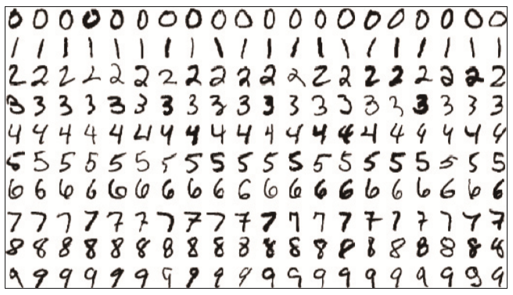

- MNIST 데이터셋은 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원등이 쓴 손글씨를 이용해 만든 데이터로 구성
- 70,000개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋
- 60,000개의 학습 데이타셋과 10,000개의 테스트 데이타셋으로 구성

## 지금까지 배운 딥러닝 기술로 MNIST 글씨 인식하기
- 전체 코드 : Simple Deep Learning

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/30
329/329 [==============================] - 4s 10ms/step - loss: 0.3205 - accuracy: 0.9097 - val_loss: 0.1734 - val_accuracy: 0.9503
Epoch 2/30
329/329 [==============================] - 3s 9ms/step - loss: 0.1339 - accuracy: 0.9610 - val_loss: 0.1238 - val_accuracy: 0.9643
Epoch 3/30
329/329 [==============================] - 3s 9ms/step - loss: 0.0868 - accuracy: 0.9756 - val_loss: 0.0986 - val_accuracy: 0.9727
Epoch 4/30
329/329 [==============================] - 3s 9ms/step - loss: 0.0614 - accuracy: 0.9823 - val_loss: 0.0945 - val_accuracy: 0.9722
Epoch 5/30
329/329 [==============================] - 3s 9ms/step - loss: 0.0461 - accuracy: 0.9866 - val_loss: 0.0864 - val_accuracy: 0.9748
Epoch 6/30
329/329 [==============================] - 3s 9ms/step - loss: 0.0330 - accuracy: 0.9914 - val_loss: 0.0774 - val_accuracy: 0.9768
Epoch 7/30
329/329 [==============================] - 3s 9ms/step - loss: 0.0247 -

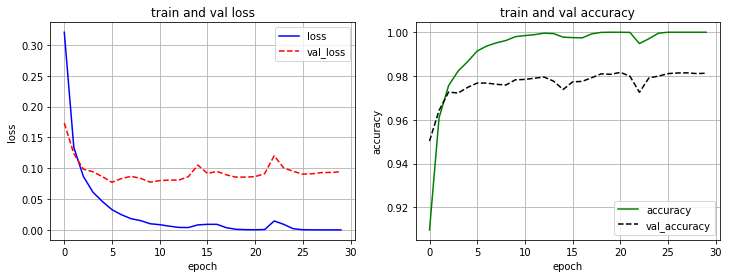

In [ ]:
from keras.datasets import mnist

# 데이타 불러오기 - 학습/테스트 데이타셋
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 검증 데이타셋 만들기
from sklearn.model_selection import train_test_split

# 학습 데이타/검증 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.3, 
                                                  random_state=42)

# 설명 데이타 정규화
x_train = (x_train.reshape(x_train.shape[0], 28*28)) / 255
x_val = (x_val.reshape(x_val.shape[0], 28*28)) / 255
x_test = (x_test.reshape(x_test.shape[0], 28*28)) / 255


# 레이블의 원-핫 인코딩
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 딥러닝 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 모델 구성하기
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 입력층 - 28*28=728개 노드, 은닉층 - 64개 노드
model.add(Dense(10, activation='softmax'))             # 출력층 - 10개 노드

# 모델 컴파일 - 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', # 손실 함수
              optimizer='adam',                # 최적화 함수
              metrics=['accuracy'])            # 모니터링할 평가 지표

# 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val))   

# 학습 결과 그래프로 표시하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# train and val loss
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['loss'], 'b-', label='loss')
ax1.plot(history.history['val_loss'], 'r--', label='val_loss')

ax1.legend()
ax1.grid()
ax1.set_title('train and val loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

# train and val accuracy
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['accuracy'], 'g-', label='accuracy')
ax2.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')

ax2.legend()
ax2.grid()
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')

plt.show()           

---
## 컨볼루션 신경망(Convolutional Neural Network, CNN, 합성곱)

## 컨볼루션 신경망(CNN) 개념
- 컨볼루션층은 이미지 픽셀 사이의 관계를 고려하므로 지역적 특징을 학습하여 이미지의 특성을 파악한다.
- 필터(=마스크) : 셀카를 찍고 나서 특정 사진 앱을 이용하여 얼굴을 변형해주는 필터와 같은 역할
- 슬라이딩 : 컨볼루션 필터가 정의된 스트라이드의 크기만큼 창문을 닦듯이 미끄러지면서 입력 데이타를 훑는 것을 의미

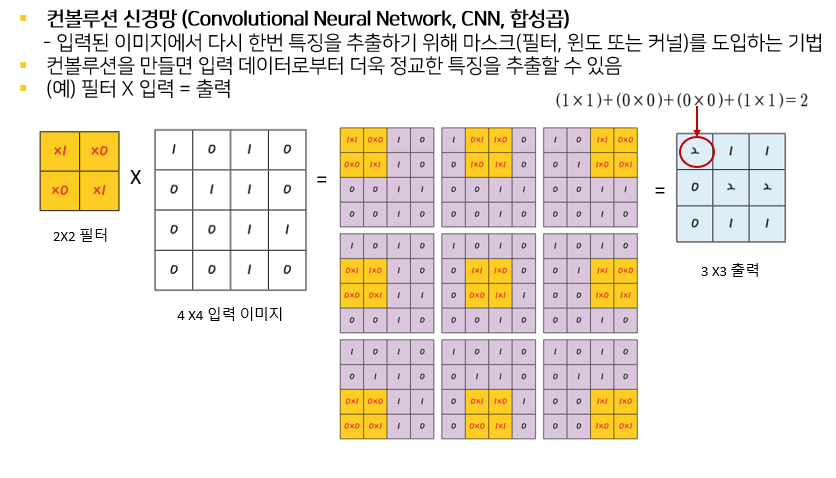

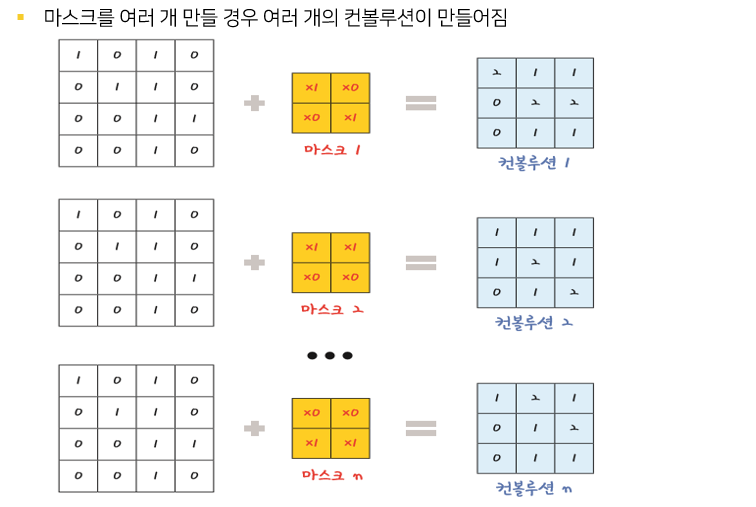

### 패딩(padding)
- 특징 맵의 크기가 감소하지 않고, 입력 데이타의 형태와 동일한 형태를 출력값으로 얻고 싶은 경우 패딩을 사용


## 케라스에서 컨볼루션 층을 추가 : Conv2D() 

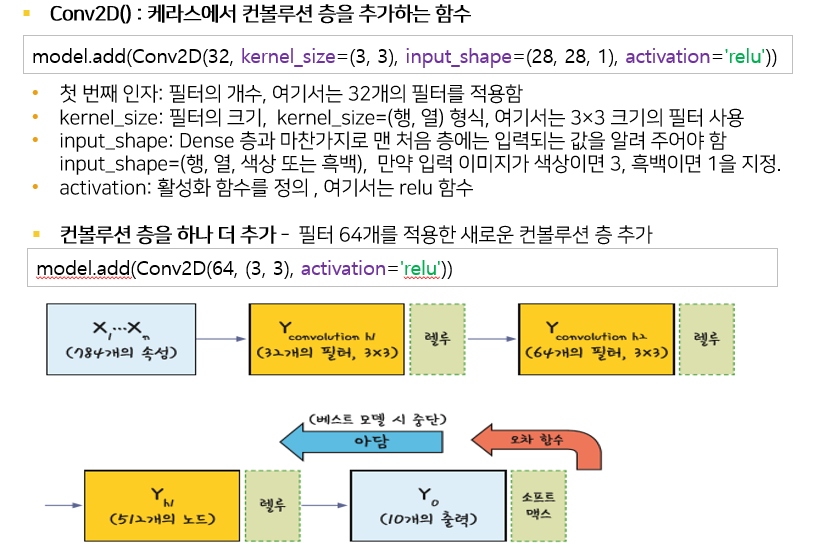

## 맥스 풀링(max pooling)

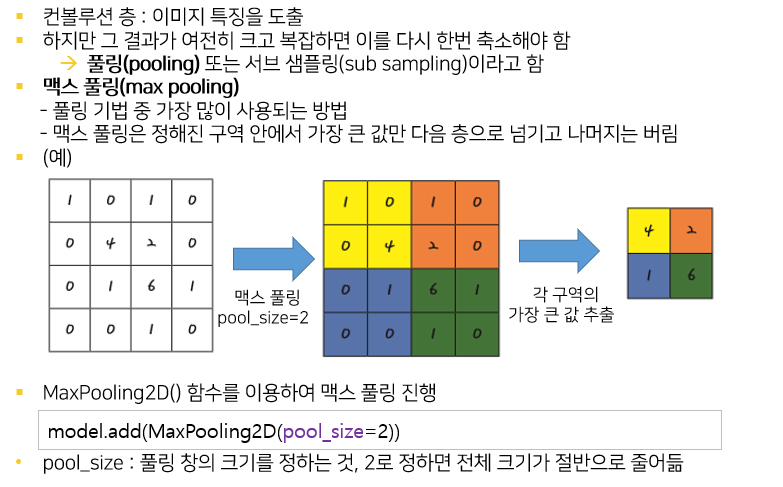

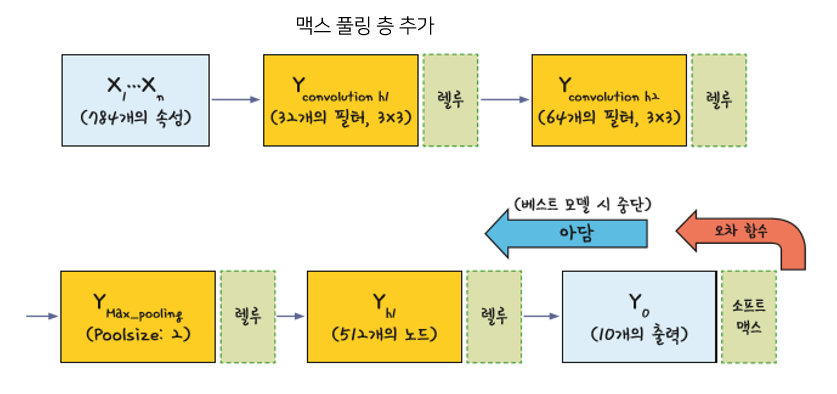

## 드롭 아웃(drop out)

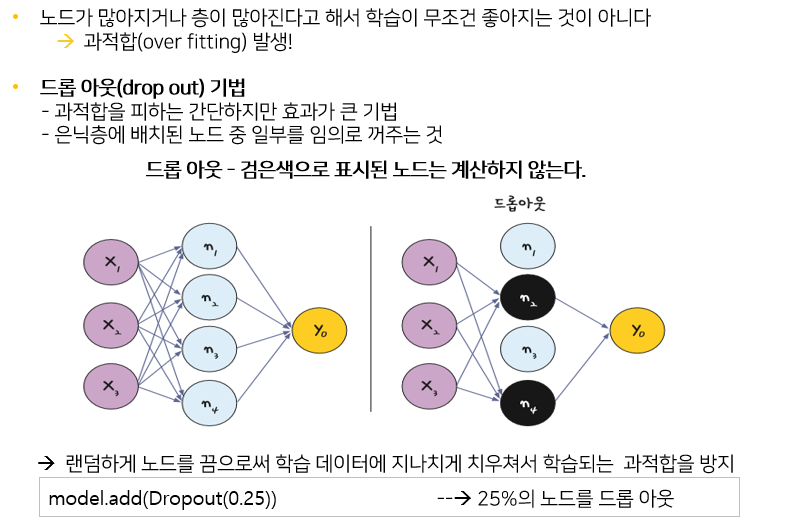

## 플래튼 : Flatten() 함수


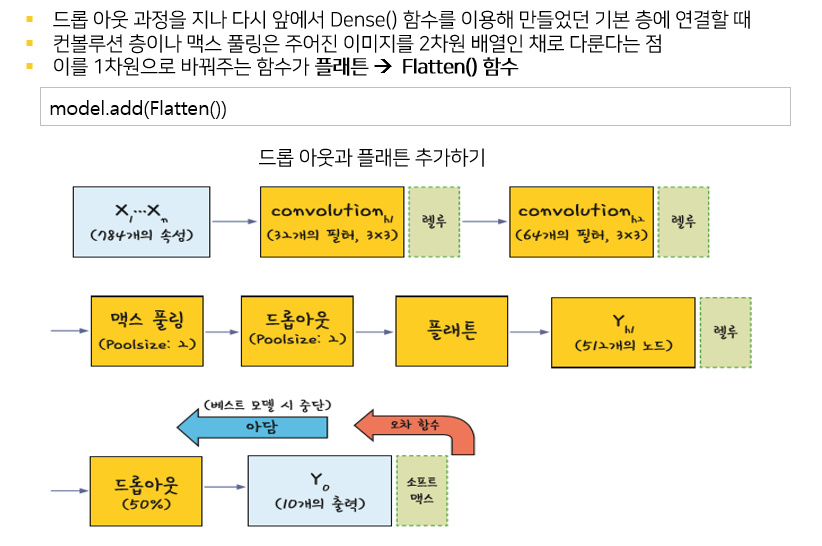

---
## 컨볼루션 신경망으로 MNIST 손글씨 인식 실행하기

### 1. 1. 데이타 정리하는 기본 코드

In [ ]:
import tensorflow as tf

# seed 값 설정
seed = 0
tf.random.set_seed(seed)

from keras.datasets import mnist

# 데이타 불러오기 - 학습/테스트 데이타셋
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 검증 데이타셋 만들기
from sklearn.model_selection import train_test_split

# 학습 데이타/검증 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.3, 
                                                  random_state=42)

# 설명 데이타 정규화
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# 레이블의 원-핫 인코딩
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


### 2. 컨볼루션 신경망의 모델 설정

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 컨볼루션 신경망의 모델 설정
model = Sequential()
# 컨볼루션(CNN)
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# 맥스 풀링
model.add(MaxPooling2D(pool_size=2))
# 드롭 아웃
model.add(Dropout(0.25))
# 플래튼
model.add(Flatten())
# 은닉층
model.add(Dense(128,  activation='relu'))
# 드롭 아웃
model.add(Dropout(0.5))
# 출력층
model.add(Dense(10, activation='softmax'))

#### 모델 요약하기

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

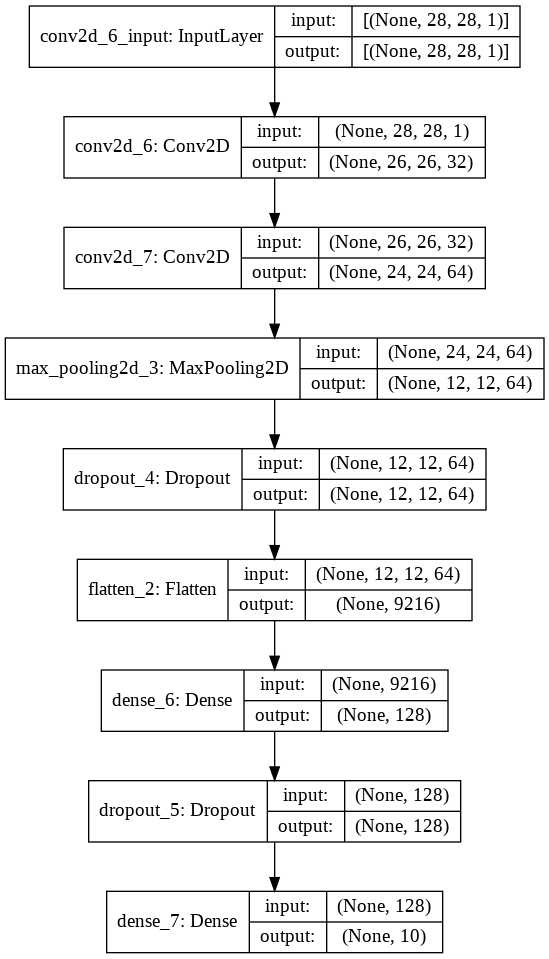

In [ ]:
from keras.utils import np_utils
tf.keras.utils.plot_model(model, 'cnn-mnist_model.png', show_shapes=True)

### 3. 모델 컴파일 - 실행 환경 설정


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 4. 모델 최적화 설정


In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
save_weights = tf.keras.callbacks.ModelCheckpoint(os.path.join(model_dir, "cnn-mnist.hdf5"),
                                                  monitor='val_accuracy',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode="max",
                                                  save_freq="epoch",
                                                  save_weights_only=True)
csv_logger = tf.keras.callbacks.CSVLogger(os.path.join(model_dir, "cnn-mnist.csv"))

### 5. 모델 학습하기

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=200,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping, save_weights, csv_logger])

Epoch 1/30
210/210 [==============================] - 34s 13ms/step - loss: 0.3329 - accuracy: 0.8988 - val_loss: 0.0842 - val_accuracy: 0.9741

Epoch 00001: val_accuracy improved from -inf to 0.97406, saving model to ./model/cnn-mnist.hdf5
Epoch 2/30
210/210 [==============================] - 2s 12ms/step - loss: 0.1083 - accuracy: 0.9686 - val_loss: 0.0530 - val_accuracy: 0.9847

Epoch 00002: val_accuracy improved from 0.97406 to 0.98467, saving model to ./model/cnn-mnist.hdf5
Epoch 3/30
210/210 [==============================] - 2s 12ms/step - loss: 0.0771 - accuracy: 0.9763 - val_loss: 0.0486 - val_accuracy: 0.9852

Epoch 00003: val_accuracy improved from 0.98467 to 0.98517, saving model to ./model/cnn-mnist.hdf5
Epoch 4/30
210/210 [==============================] - 2s 12ms/step - loss: 0.0621 - accuracy: 0.9804 - val_loss: 0.0451 - val_accuracy: 0.9864

Epoch 00004: val_accuracy improved from 0.98517 to 0.98639, saving model to ./model/cnn-mnist.hdf5
Epoch 5/30
210/210 [==========

### 6. 모델 정확도 출력

In [ ]:
# 모델 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0359 - accuracy: 0.9909

 Test Accuracy: 0.9909


### 7. 모델 학습 결과 그래프로 표현하기

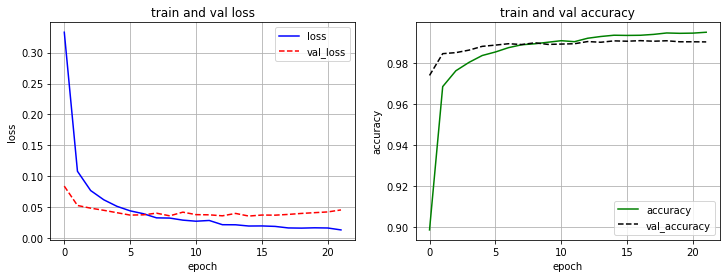

In [ ]:
# 학습 결과 그래프로 표시하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# train and val loss
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['loss'], 'b-', label='loss')
ax1.plot(history.history['val_loss'], 'r--', label='val_loss')

ax1.legend()
ax1.grid()
ax1.set_title('train and val loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

# train and val accuracy
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['accuracy'], 'g-', label='accuracy')
ax2.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')

ax2.legend()
ax2.grid()
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')

plt.show()

### 전체 코드

### 실행 결과 해석
- 17번째 에포크에서 베스트 모델을 만들었고 22번째 에포크에서 학습이 자동 중단됨
- 테스트 정확도가 99.09%로 향상됨
- 0.9909, 즉 99.09%의 정확도는 10,000개의 테스트 이미지 중 9,905개를 맞추었다는 뜻
- 100% 다 맞히지 못한 이유는 데이터 안에 다음과 같이 확인할 수 없는 글씨가 들어있었기 때문

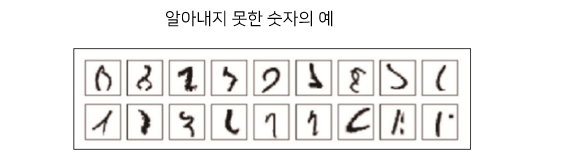

- 우리가 만든 딥러닝 모델은 이미 사람의 인식 정도와 같거나 이를 뛰어넘는 인식률을 보여 준다!